In [ ]:
!unzip  /content/BAU_HW_CAT_DOG_CLASSIFICATION.zip

Archive:  /content/BAU_HW_CAT_DOG_CLASSIFICATION.zip
   creating: BAU_HW_CAT_DOG_CLASSIFICATION/
   creating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/
   creating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4801.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4802.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4803.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4804.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4805.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4806.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4807.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4808.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4809.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4810.jpg  
  inflating: BAU_HW_CAT_DOG_CLASSIFICATION/test_set/cats/cat.4811.jpg  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_path = '/content/BAU_HW_CAT_DOG_CLASSIFICATION/training_set'
train_set = train_datagen.flow_from_directory(directory=train_path,target_size=(150,150),batch_size=32,color_mode="rgb",class_mode = 'binary')
test_path = '/content/BAU_HW_CAT_DOG_CLASSIFICATION/test_set'
test_set = train_datagen.flow_from_directory(directory=train_path,target_size=(150,150),batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


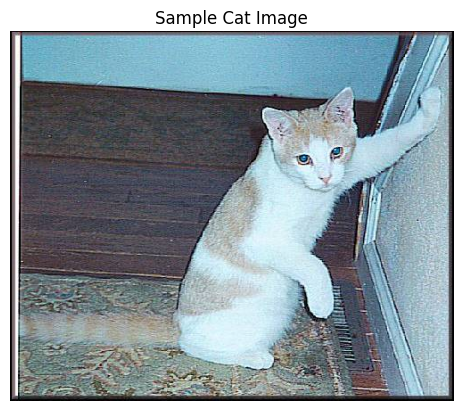

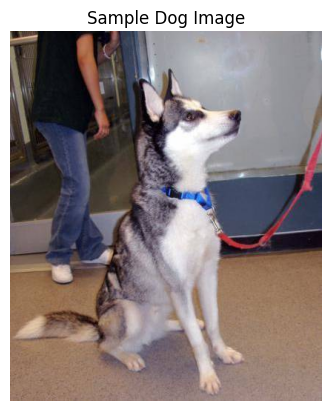

In [ ]:
img=load_img(train_path + "/cats/cat.4001.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Cat Image")
plt.show()

plt.figure()

img=load_img(train_path + "/dogs/dog.4001.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Dog Image")
plt.show()

In [ ]:
# Model Architecture
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
model = Sequential()

# Add convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
model.add(Conv2D(16, (3, 3), activation='sigmoid', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# Add another convolutional layer with 64 filters and kernel size 3x3
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
# Add output layer with 1 unit
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 32)        128       
 chNormalization)                                                
                                                     

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(train_set, validation_data = test_set, epochs = 20)

Epoch 1/20
50/50 [==============================] - 9s 122ms/step - loss: 0.9004 - accuracy: 0.5806 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 5s 106ms/step - loss: 0.7325 - accuracy: 0.5938 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 3/20
50/50 [==============================] - 8s 163ms/step - loss: 0.6507 - accuracy: 0.6400 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/20
50/50 [==============================] - 5s 108ms/step - loss: 0.6373 - accuracy: 0.6575 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 5/20
50/50 [==============================] - 7s 137ms/step - loss: 0.5964 - accuracy: 0.6906 - val_loss: 0.9061 - val_accuracy: 0.5000
Epoch 6/20
50/50 [==============================] - 8s 162ms/step - loss: 0.5331 - accuracy: 0.7419 - val_loss: 1.8012 - val_accuracy: 0.5000
Epoch 7/20
50/50 [==============================] - 9s 175ms/step - loss: 0.4554 - accuracy: 0.7919 - val_loss: 1.9484 - val_accuracy: 0.5000
Epoch 

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(test_set)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

54/54 [==============================] - 3s 52ms/step - loss: 0.0690 - accuracy: 0.9769
Model Loss is 0.06901633739471436
Model Accuracy is 0.9768750071525574


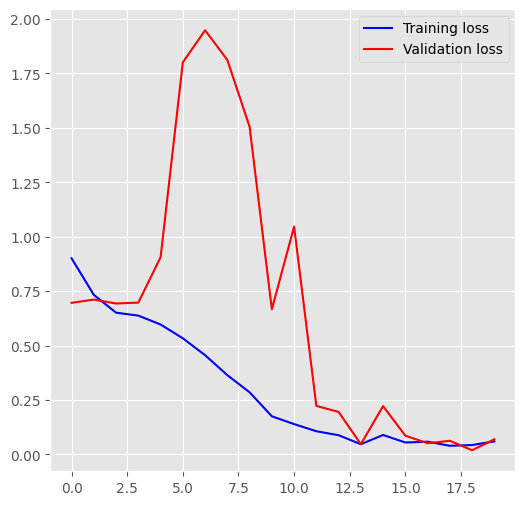

<Figure size 640x480 with 0 Axes>

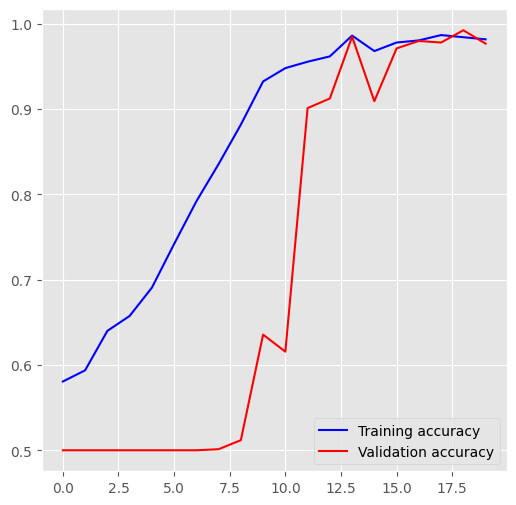

In [ ]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()